## Workshop 1b: Mixed Integer Linear Program Exercise

### 1. Installing and Importing Packages 

We first need to pull in all the packages we will be using. Pyomo is a Python-based, open-source optimization modelling language with a diverse set of optimization capabilities. For more information, see the Pyomo [documentation](https://pyomo.readthedocs.io/en/stable/).

In [2]:
import matplotlib.pyplot as plt
from pyomo.environ import *
import numpy as np
from ipywidgets import FloatSlider, interact, widgets
import platform
from IPython.display import display

# Ipopt solver setup for Windows or Linux
def setup_solver():
    os_name = platform.system()
    if os_name == "Windows":
        return "solver/ipopt.exe"
    elif os_name == "Linux":
        !chmod +x "solver/ipopt"
        return "solver/ipopt"


solver_executable = setup_solver()

### 1. MILP with Binary Variable

A key feature of MILP formulations is the potential to have a binary variable, such as $y_3$ in this formulation.

$$
\text{minimize} \quad 18x_1 + 3x_2 + 9(20y_3)
$$

$$
\text{subject to:} \quad 2x_1 + 10x_2 + 7(2y_3) \geq 150
$$

$$
5 \leq x_1 \leq 60
$$

$$
10 \leq x_2 \leq 30
$$

$$
x_1, x_2 \in \mathbb{R}^+
$$

$$
y_3 \in \{0, 1\}
$$


In [3]:
# Create a Pyomo model
model = ConcreteModel()

# Define decision variables
model.x1 = Var(bounds=(5,60), within=NonNegativeReals)
model.x2 = Var(bounds=(10,30), within=NonNegativeReals)
model.y3 = Var(within=Binary)

# Objective function
model.obj = Objective(expr=18 * model.x1 + 3 * model.x2 + 9 * 20 * model.y3, sense=minimize)

# Constraints
model.con1 = Constraint(expr=2 * model.x1 + 10*model.x2 + 7 * 2 * model.y3 >= 150)

# Create a solver
solver = SolverFactory('ipopt', executable=solver_executable)

# Solve the model
solver.solve(model)

# Display the results
print(f"x1: {model.x1():.2f}")
print(f"x2: {model.x2():.2f}")
print(f"y3: {int(model.y3())}")

# Print full model details (optional)
#model.pprint()

x1: 5.00
x2: 14.00
y3: 0


#### a. Visualising MILP as two LPs

Problem 1: Setting $y_3 = 0$ 

$$
\text{minimize} \quad 18x_1 + 3x_2
$$

$$
\text{s.t.} \quad 2x_1 + 10x_2  \geq 150
$$

$$
5 \leq x_1 \leq 60
$$

$$
10 \leq x_2 \leq 30
$$

$$
x_1, x_2 \in \mathbb{R}^+
$$

---

Problem 2: Setting $y_3 = 1$ 

$$
\text{minimize} \quad 18x_1 + 3x_2 + 180
$$

$$
\text{s.t.} \quad 2x_1 + 10x_2  \geq 136
$$

$$
5 \leq x_1 \leq 60
$$

$$
10 \leq x_2 \leq 30
$$
$$
x_1, x_2 \in \mathbb{R}^+
$$


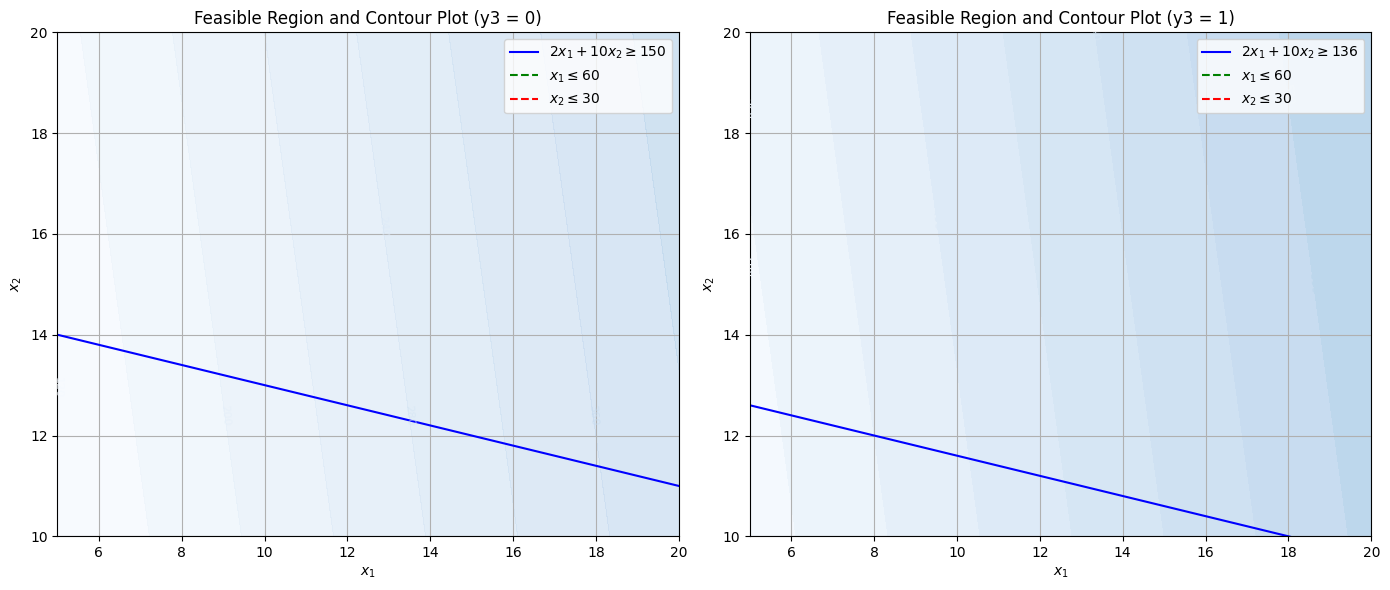

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range for x1 and x2
x1 = np.linspace(5, 60, 400)
x2 = np.linspace(10, 30, 300)
X1, X2 = np.meshgrid(x1, x2)

# Define constraints for y3 = 0
constraint1_y0 = 2 * X1 + 10 * X2 >= 150  # 2x1 + 10x2 >= 150

# Define constraints for y3 = 1
constraint1_y1 = 2 * X1 + 10 * X2 >= 136  # 2x1 + 10x2 >= 136

# Create masks for feasible regions
feasible_region_y0 = constraint1_y0
feasible_region_y1 = constraint1_y1

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Problem when y3 = 0
ax1 = axs[0]
# Plot constraints as lines
ax1.plot(x1, (150 - 2 * x1) / 10, label=r'$2x_1 + 10x_2 \geq 150$', color='blue')  # 2x1 + 10x2 = 150
# Fill the feasible region
ax1.fill_between(x1, 10, (150 - 2 * x1) / 10, where=(feasible_region_y0[0]), color='lightblue', alpha=0.5)
# Plot variable bounds
ax1.axvline(x=60, color='green', linestyle='--', label=r'$x_1 \leq 60$')  # x1 constraint
ax1.axhline(y=30, color='red', linestyle='--', label=r'$x_2 \leq 30$')  # x2 constraint
# Plot the contour lines for the objective function when y3 = 0
Z_y0 = 18 * X1 + 3 * X2
contour1 = ax1.contourf(X1, X2, Z_y0, levels=30, cmap='Blues', alpha=0.7)
ax1.clabel(contour1, inline=True, fontsize=8, fmt='%.0f')
ax1.set_xlim(5, 20)
ax1.set_ylim(10, 20)
ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')
ax1.set_title('Feasible Region and Contour Plot (y3 = 0)')
ax1.legend()
ax1.grid(True)

# Second subplot: Problem when y3 = 1
ax2 = axs[1]
# Plot constraints as lines
ax2.plot(x1, (136 - 2 * x1) / 10, label=r'$2x_1 + 10x_2 \geq 136$', color='blue')  # 2x1 + 10x2 = 136
# Fill the feasible region
ax2.fill_between(x1, 10, (136 - 2 * x1) / 10, where=(feasible_region_y1[0]), color='lightblue', alpha=1)
# Plot variable bounds
ax2.axvline(x=60, color='green', linestyle='--', label=r'$x_1 \leq 60$')  # x1 constraint
ax2.axhline(y=30, color='red', linestyle='--', label=r'$x_2 \leq 30$')  # x2 constraint
# Plot the contour lines for the objective function when y3 = 1
Z_y1 = 18 * X1 + 3 * X2 + 180
contour2 = ax2.contourf(X1, X2, Z_y1, levels=30, cmap='Blues', alpha=1)
ax2.clabel(contour2, inline=True, fontsize=8, fmt='%.0f')
ax2.set_xlim(5, 20)
ax2.set_ylim(10, 20)
ax2.set_xlabel(r'$x_1$')
ax2.set_ylabel(r'$x_2$')
ax2.set_title('Feasible Region and Contour Plot (y3 = 1)')
ax2.legend()
ax2.grid(True)

# Adjust layout
plt.tight_layout()
# Show the plot
plt.show()


In [13]:
#TODO Modeling Semi-Continuous Variables using binary variable
#TODO Formally introduce big M?
